In [74]:
import pandas as pd
import numpy as np
import os 
from sklearn.utils import shuffle
import random
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [34]:
images=[]
labels=[]
for class_name in os.listdir('Emotions'):
    path_a='Emotions/'+class_name
    for image in os.listdir(path_a):
        path_b=path_a+'/'+image
        images.append(path_b)
        labels.append(class_name)

In [35]:
images[:10]

['Emotions/Happy/04648849_big.jpg',
 'Emotions/Happy/05-12-21-happy-people.jpg',
 'Emotions/Happy/05513ba5-dd72-4291-b711-19e154a343ea.jpg',
 'Emotions/Happy/1 (1).jpeg',
 'Emotions/Happy/1 (1).jpg',
 'Emotions/Happy/1 (1).png',
 'Emotions/Happy/1 (10).jpeg',
 'Emotions/Happy/1 (10).jpg',
 'Emotions/Happy/1 (100).jpg',
 'Emotions/Happy/1 (102).jpg']

In [36]:
labels[:10]

['Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy']

In [37]:
images,labels=shuffle(images,labels)

In [38]:
images[:10]

['Emotions/Sad/1 (504).jpg',
 'Emotions/Sad/4 (596).jpg',
 'Emotions/Sad/8 (3).jpg',
 'Emotions/Happy/1 (116).jpg',
 'Emotions/Happy/11 (587).jpg',
 'Emotions/Sad/7 (195).jpg',
 'Emotions/Sad/2 (58).jpg',
 'Emotions/Happy/10 (239).jpg',
 'Emotions/Happy/10 (220).jpg',
 'Emotions/Happy/images140.jpg']

In [39]:
labels[:10]

['Sad',
 'Sad',
 'Sad',
 'Happy',
 'Happy',
 'Sad',
 'Sad',
 'Happy',
 'Happy',
 'Happy']

In [40]:
len(images)

9082

In [41]:
len(labels)

9082

In [42]:
df=pd.DataFrame()
df['images']=images
df['labels']=labels

In [43]:
df.head()

,images,labels
0,Emotions/Sad/1 (504).jpg,Sad
1,Emotions/Sad/4 (596).jpg,Sad
2,Emotions/Sad/8 (3).jpg,Sad
3,Emotions/Happy/1 (116).jpg,Happy
4,Emotions/Happy/11 (587).jpg,Happy


In [44]:
def EDA(lbl):
    plt.figure(figsize=(20,20))
    temp=df['images'][df['labels']==lbl]
    start=random.randint(0,len(temp))
    files=temp[start:start+25]
    for index,file in enumerate(files):
        plt.subplot(5,5,index+1)
        img=load_img(file)
        img=np.array(img)
        plt.imshow(img)
        plt.title(lbl)
        plt.axis('off')

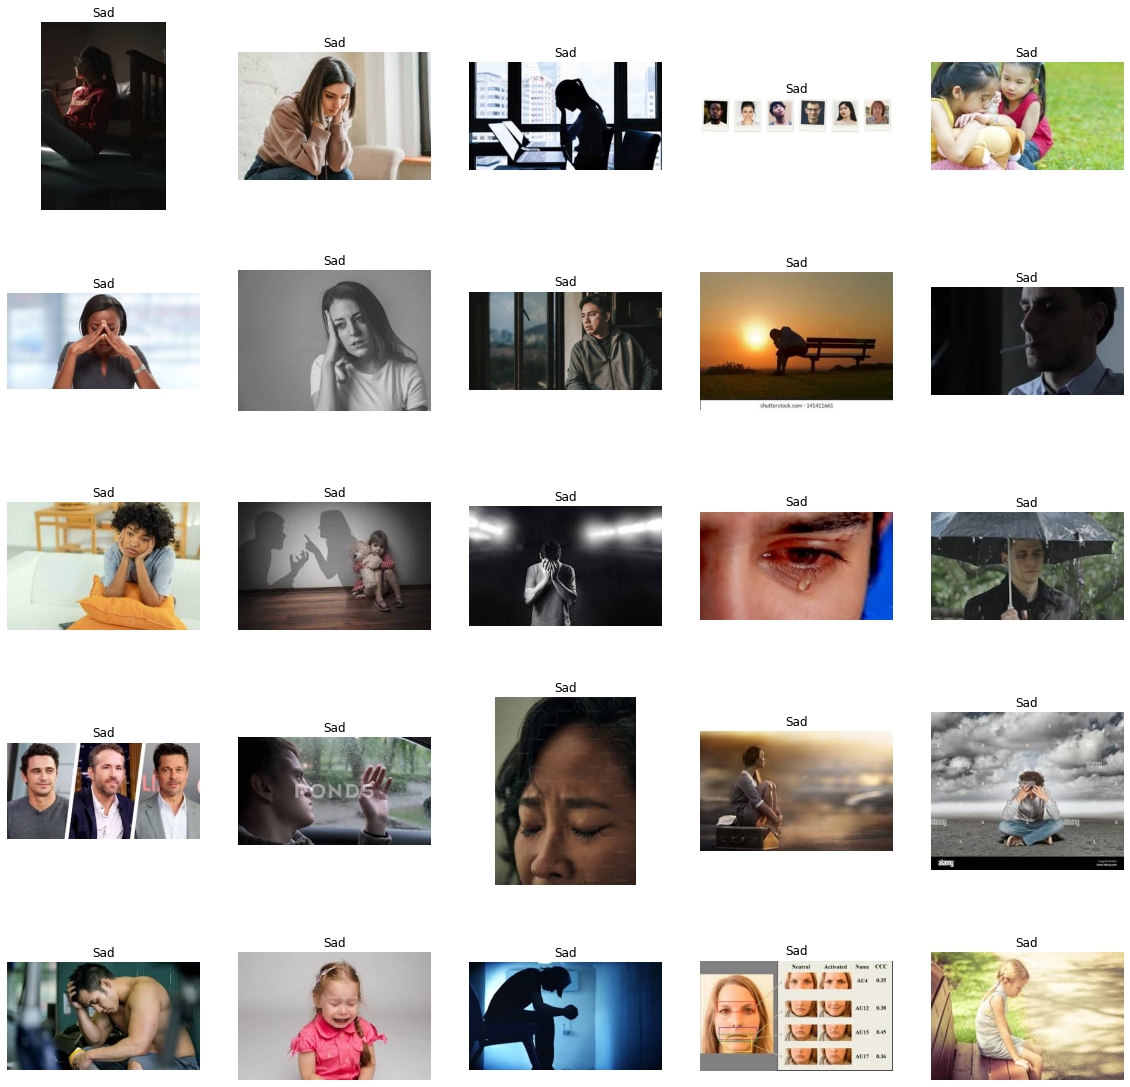

In [45]:
EDA('Sad')

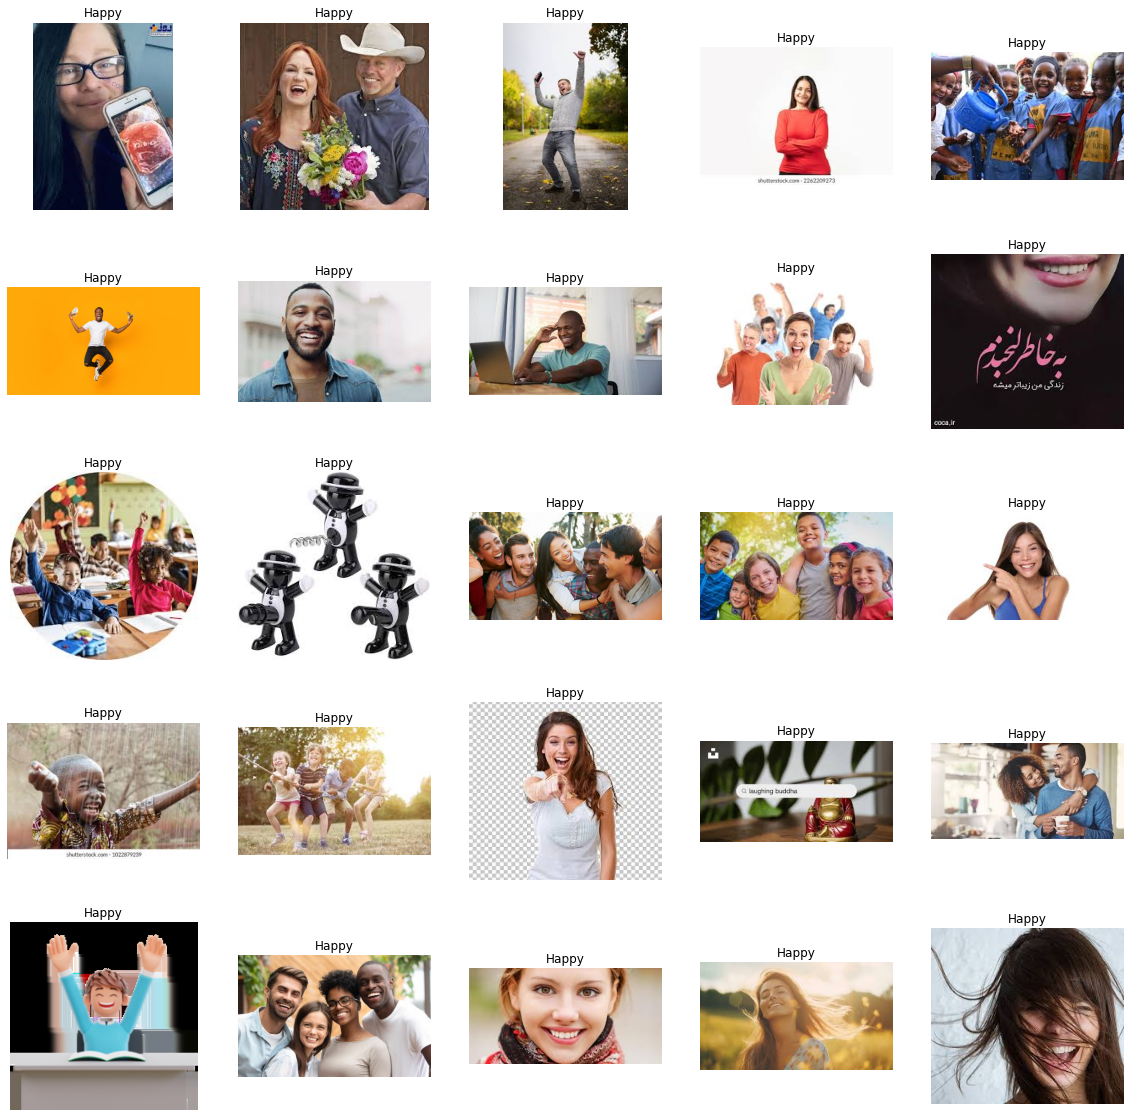

In [46]:
EDA('Happy')

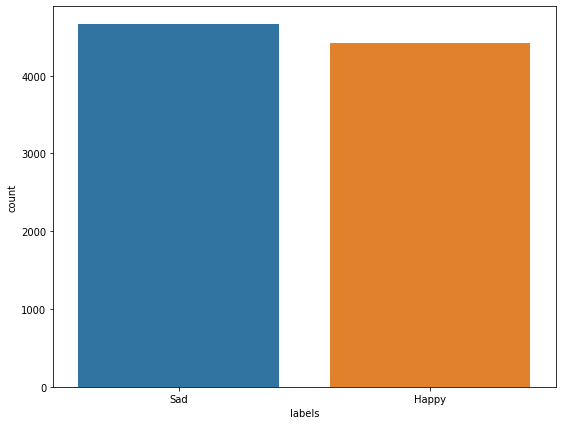

In [47]:
plt.figure(figsize=(9,7))
sns.countplot(data=df,x='labels')
plt.show()

In [48]:
X_train,X_test,y_train,y_test=train_test_split(df['images'],df['labels'],test_size=0.2,random_state=101,stratify=df['labels'])

In [49]:
X_train

3685        Emotions/Sad/1 (223).jpg
5434        Emotions/Sad/4 (535).jpg
5470     Emotions/Happy/11 (257).jpg
6929     Emotions/Happy/10 (370).jpg
773         Emotions/Sad/4 (471).jpg
                    ...             
5774      Emotions/Happy/4 (264).jpg
733         Emotions/Sad/3 (452).jpg
1707    Emotions/Happy/images424.jpg
5250        Emotions/Sad/7 (174).jpg
7568        Emotions/Sad/8 (308).jpg
Name: images, Length: 7265, dtype: object

In [50]:
y_train

3685      Sad
5434      Sad
5470    Happy
6929    Happy
773       Sad
        ...  
5774    Happy
733       Sad
1707    Happy
5250      Sad
7568      Sad
Name: labels, Length: 7265, dtype: object

In [51]:
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5,random_state=101,stratify=y_test)

In [52]:
X_train.shape

(7265,)

In [53]:
X_test.shape

(908,)

In [54]:
X_val.shape

(909,)

In [55]:
df_train=pd.DataFrame()
df_train['images']=X_train
df_train['labels']=y_train

In [56]:
df_train

,images,labels
3685,Emotions/Sad/1 (223).jpg,Sad
5434,Emotions/Sad/4 (535).jpg,Sad
5470,Emotions/Happy/11 (257).jpg,Happy
6929,Emotions/Happy/10 (370).jpg,Happy
773,Emotions/Sad/4 (471).jpg,Sad
...,...,...
5774,Emotions/Happy/4 (264).jpg,Happy
733,Emotions/Sad/3 (452).jpg,Sad
1707,Emotions/Happy/images424.jpg,Happy
5250,Emotions/Sad/7 (174).jpg,Sad


In [57]:
df_val=pd.DataFrame()
df_val['images']=X_val
df_val['labels']=y_val

In [58]:
df_val

,images,labels
7372,Emotions/Sad/1 (311).jpg,Sad
7404,Emotions/Happy/10 (876).jpg,Happy
8408,Emotions/Happy/10 (102).jpg,Happy
6940,Emotions/Happy/1 (36).jpg,Happy
5395,Emotions/Sad/1 (23).jpg,Sad
...,...,...
6463,Emotions/Happy/12 (380).jpg,Happy
8613,Emotions/Happy/12 (369).jpg,Happy
4588,Emotions/Sad/8 (286).jpg,Sad
4668,Emotions/Happy/11 (513).jpg,Happy


In [59]:
train_generator=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_generator=ImageDataGenerator(
    rescale=1./255
)
train_iterator=train_generator.flow_from_dataframe(
    df_train,
    x_col='images',
    y_col='labels',
    target_size=(80,80),
    batch_size=64,
    class_mode='binary'
)
val_iterator=val_generator.flow_from_dataframe(
    df_val,
    x_col='images',
    y_col='labels',
    target_size=(80,80),
    batch_size=64,
    class_mode='binary'
)

Found 7256 validated image filenames belonging to 2 classes.
Found 907 validated image filenames belonging to 2 classes.


In [60]:
model=Sequential([
    Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(80,80,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3),padding='same',activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(16,(3,3),padding='same',activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dropout(0.4),
    Dense(256,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [61]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)

In [62]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 80, 80, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 40, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 40, 40, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 20, 20, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 20, 20, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 10, 10, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         409,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 424,881 (1.62 MB)

 Trainable params: 424,881 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
hist=model.fit(train_iterator,epochs=75,validation_data=val_iterator)

Epoch 1/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 57s 461ms/step - accuracy: 0.5659 - loss: 0.6789 - val_accuracy: 0.7211 - val_loss: 0.5415
Epoch 2/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 47s 404ms/step - accuracy: 0.7232 - loss: 0.5505 - val_accuracy: 0.6725 - val_loss: 0.5693
Epoch 3/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 51s 414ms/step - accuracy: 0.7347 - loss: 0.5321 - val_accuracy: 0.7310 - val_loss: 0.5340
Epoch 4/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 44s 368ms/step - accuracy: 0.7469 - loss: 0.5124 - val_accuracy: 0.6880 - val_loss: 0.5481
Epoch 5/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 44s 369ms/step - accuracy: 0.7407 - loss: 0.5089 - val_accuracy: 0.7552 - val_loss: 0.5032
Epoch 6/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 52s 433ms/step - accuracy: 0.7496 - loss: 0.4957 - val_accuracy: 0.7255 - val_loss: 0.5173
Epoch 7/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 44s 362ms/step - accuracy: 0.7704 - loss: 0.4834 - val_accuracy: 0.7861 - val_loss: 0.4523
Epoch 8/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 44s 368ms/step - accuracy: 0.7843 - loss: 0

114/114 ━━━━━━━━━━━━━━━━━━━━ 43s 361ms/step - accuracy: 0.8373 - loss: 0.3612 - val_accuracy: 0.8148 - val_loss: 0.4199
Epoch 51/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 44s 370ms/step - accuracy: 0.8433 - loss: 0.3433 - val_accuracy: 0.8060 - val_loss: 0.4104
Epoch 52/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 44s 371ms/step - accuracy: 0.8462 - loss: 0.3391 - val_accuracy: 0.8269 - val_loss: 0.4063
Epoch 53/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 43s 362ms/step - accuracy: 0.8430 - loss: 0.3487 - val_accuracy: 0.8148 - val_loss: 0.4095
Epoch 54/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 43s 354ms/step - accuracy: 0.8454 - loss: 0.3452 - val_accuracy: 0.8071 - val_loss: 0.4297
Epoch 55/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 43s 362ms/step - accuracy: 0.8390 - loss: 0.3597 - val_accuracy: 0.8335 - val_loss: 0.3972
Epoch 56/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 43s 361ms/step - accuracy: 0.8443 - loss: 0.3369 - val_accuracy: 0.8236 - val_loss: 0.4181
Epoch 57/75
114/114 ━━━━━━━━━━━━━━━━━━━━ 45s 359ms/step - accuracy: 0.8551 - loss: 0.329

In [65]:
df_test=pd.DataFrame()
df_test['images']=X_test
df_test['labels']=y_test

In [67]:
test_generator=ImageDataGenerator(
    rescale=1./255
)
test_iterator=test_generator.flow_from_dataframe(
    df_test,
    x_col='images',
    y_col='labels',
    target_size=(80,80),
    batch_size=64,
    class_mode='binary'
)

Found 906 validated image filenames belonging to 2 classes.


In [68]:
model.evaluate(test_iterator)

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 0.8178 - loss: 0.4465


[0.41224992275238037, 0.823399543762207]

In [69]:
y_pred=model.predict(test_iterator)

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step


In [70]:
y_pred[:10]

array([[0.99549615],
       [0.9987763 ],
       [0.12375306],
       [0.9584303 ],
       [0.10299989],
       [0.15059093],
       [0.02211753],
       [0.33933955],
       [0.63870203],
       [0.78557307]], dtype=float32)

In [72]:
y_predict=[]
for i in y_pred:
    if i>0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [73]:
y_predict[:10]

[1, 1, 0, 1, 0, 0, 0, 0, 1, 1]

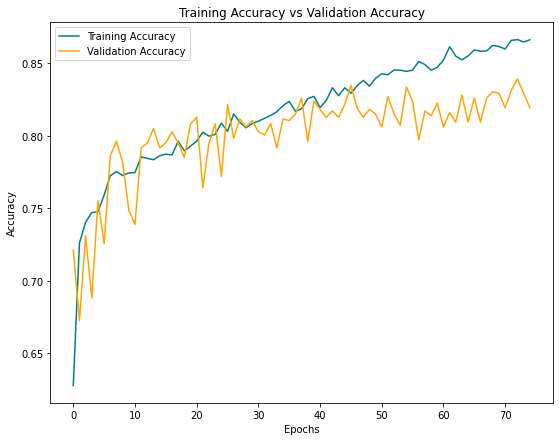

In [77]:
plt.figure(figsize=(9,7))
plt.plot(hist.history['accuracy'],color='teal',label='Training Accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

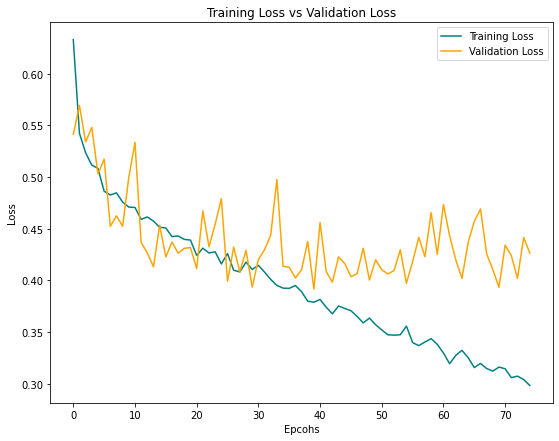

In [78]:
plt.figure(figsize=(9,7))
plt.plot(hist.history['loss'],color='teal',label='Training Loss')
plt.plot(hist.history['val_loss'],color='orange',label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epcohs')
plt.ylabel('Loss')
plt.legend()
plt.show()